No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


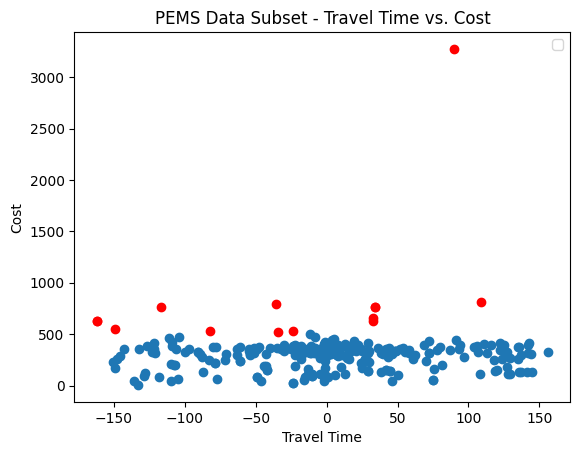

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("./PEMS08.csv")

subset_data = data[['from', 'to', 'cost']]

travel_time = subset_data['to'] - subset_data['from']

mask = subset_data['cost'] > 500

plt.scatter(travel_time[~mask], subset_data['cost'][~mask])

plt.scatter(travel_time[mask], subset_data['cost'][mask], color='red')

plt.xlabel("Travel Time")
plt.ylabel("Cost")
plt.title("PEMS Data Subset - Travel Time vs. Cost")
plt.legend()
plt.show()


according to selected traffic dataset visualization

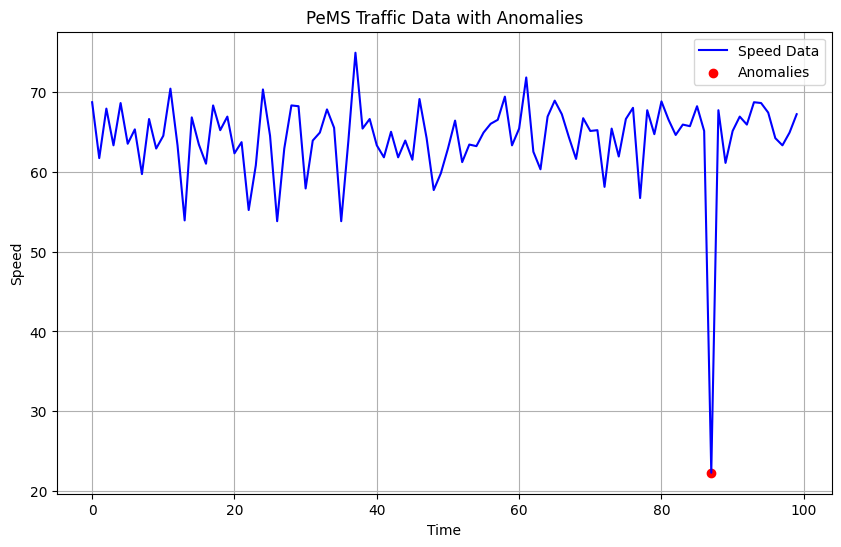

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

pems_data = pd.read_csv('./selected_traffic.csv')

speed_data = pems_data['speed']

anomalies = speed_data[(speed_data < 30)]

plt.figure(figsize=(10, 6))
plt.plot(speed_data, label='Speed Data', color='blue')
plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies')
plt.title('PeMS Traffic Data with Anomalies')
plt.xlabel('Time')
plt.ylabel('Speed')
plt.legend()
plt.grid(True)
plt.show()


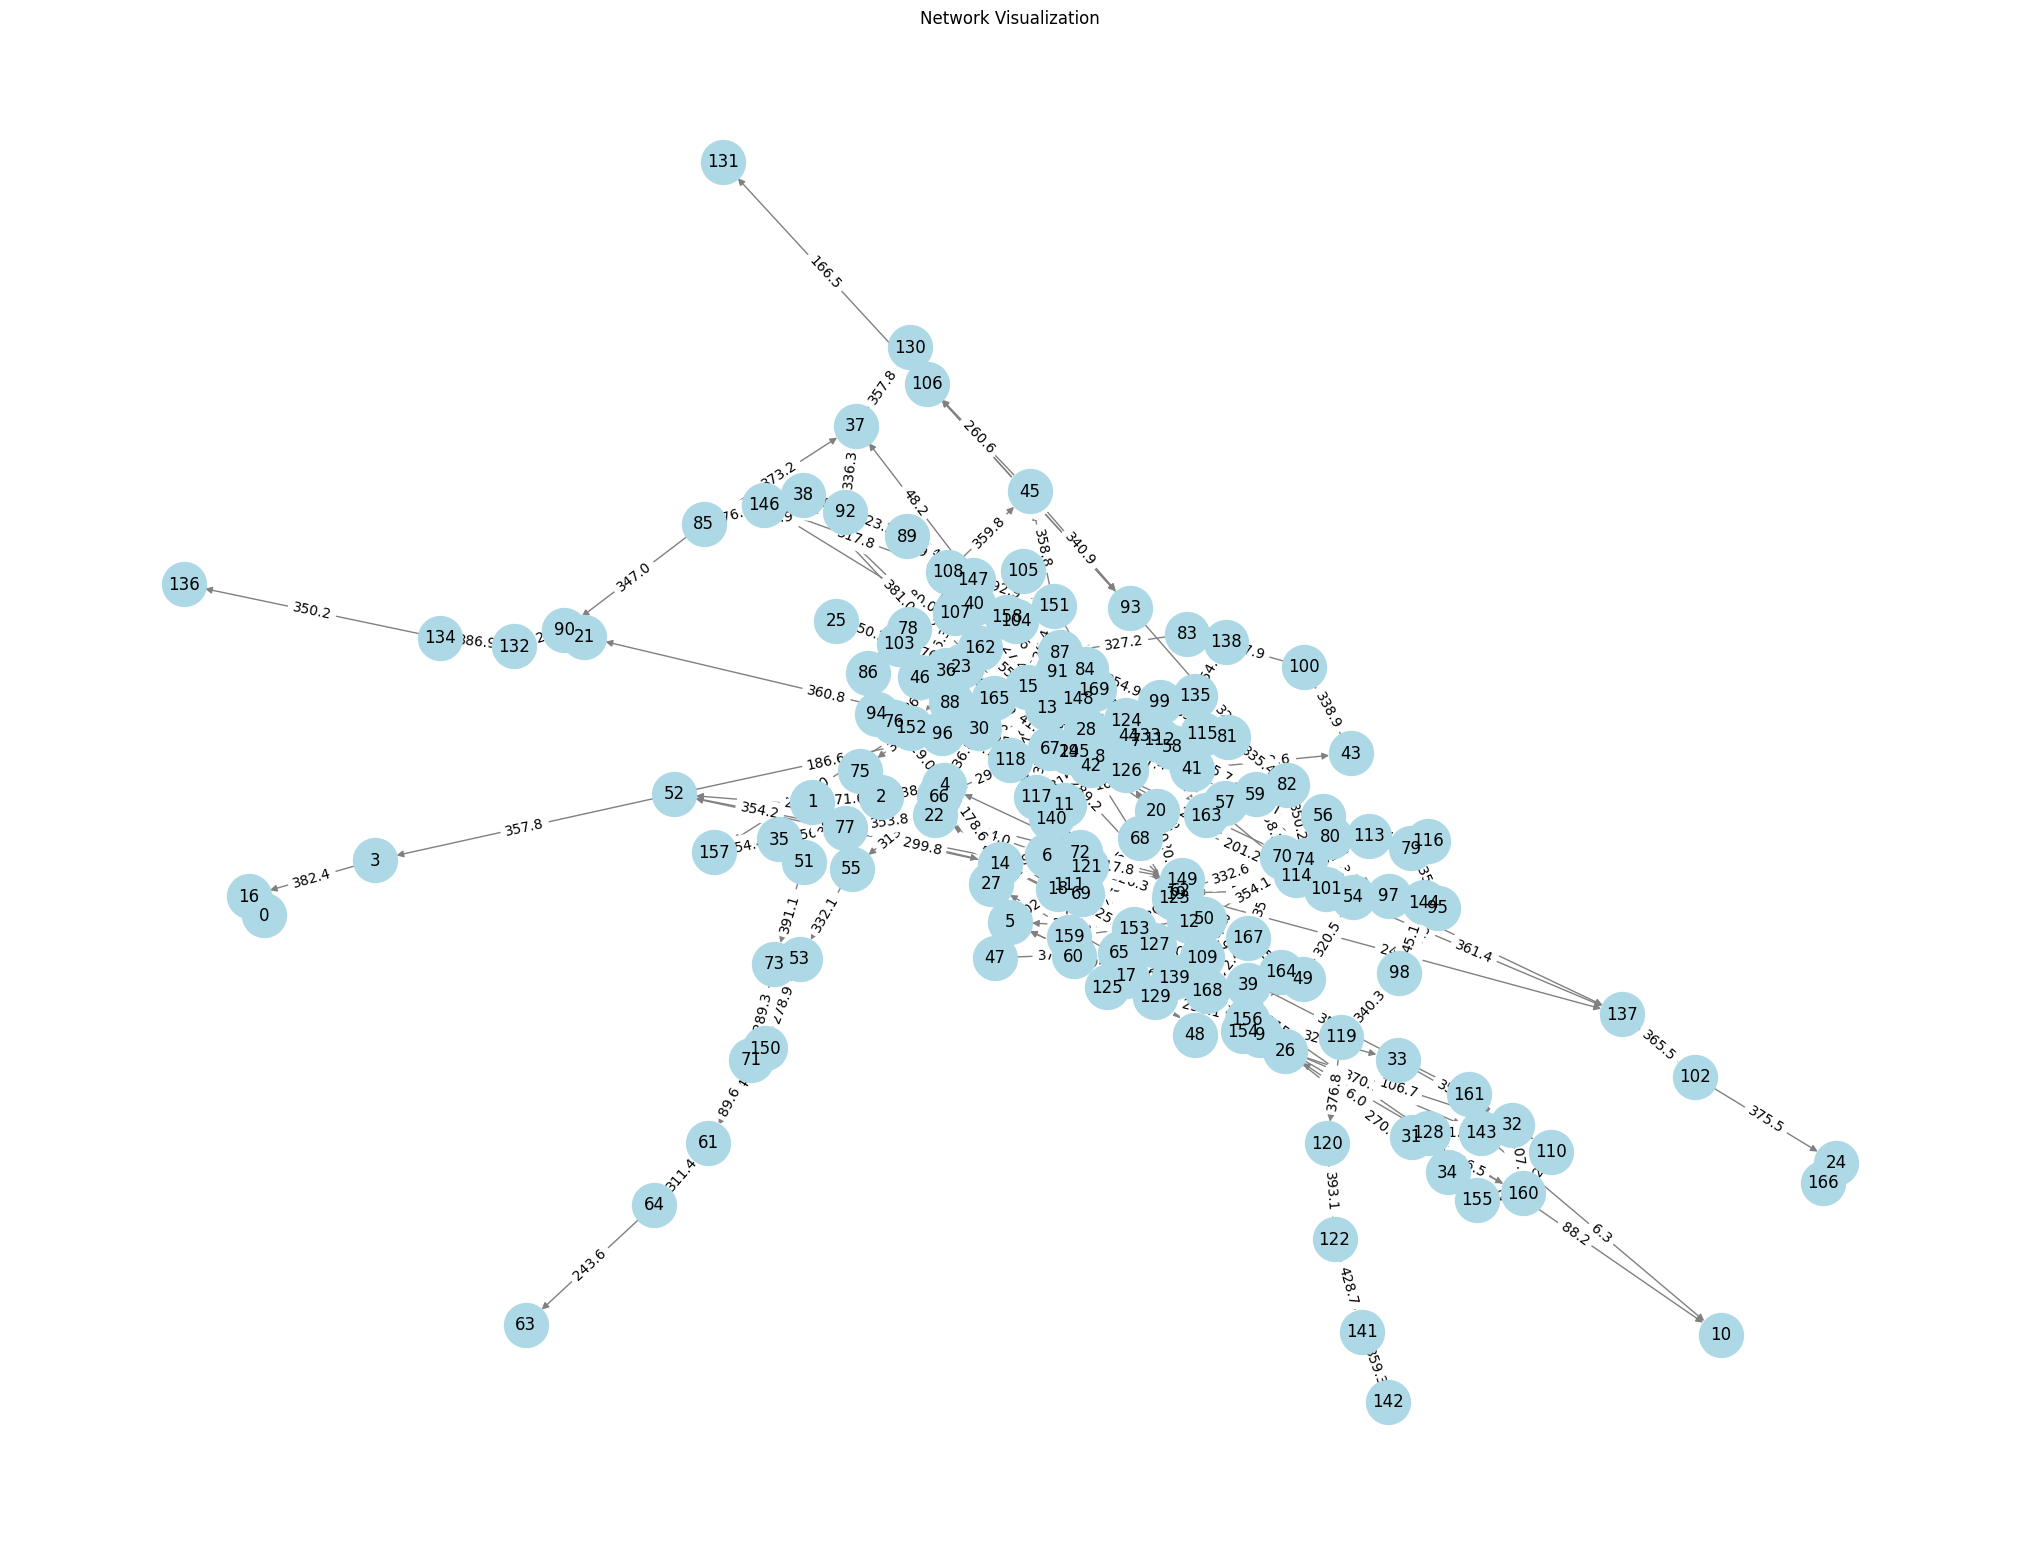

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('./PEMS08.csv')

# Step 2: Create a directed graph from the DataFrame
G = nx.from_pandas_edgelist(df, 'from', 'to', ['cost'], create_using=nx.DiGraph)

# Step 3: Optionally, define node positions and draw the graph
pos = nx.spring_layout(G)  # You can use any layout algorithm here

# Create a larger figure
plt.figure(figsize=(20, 15))

nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', edge_color='gray', arrows=True)
labels = nx.get_edge_attributes(G, 'cost')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Network Visualization')
plt.show()


High Cost Edges: [(169, 7), (18, 6), (101, 19), (44, 8), (41, 7), (8, 117), (8, 42), (8, 41), (72, 162), (162, 13), (124, 7), (7, 40), (130, 106)]


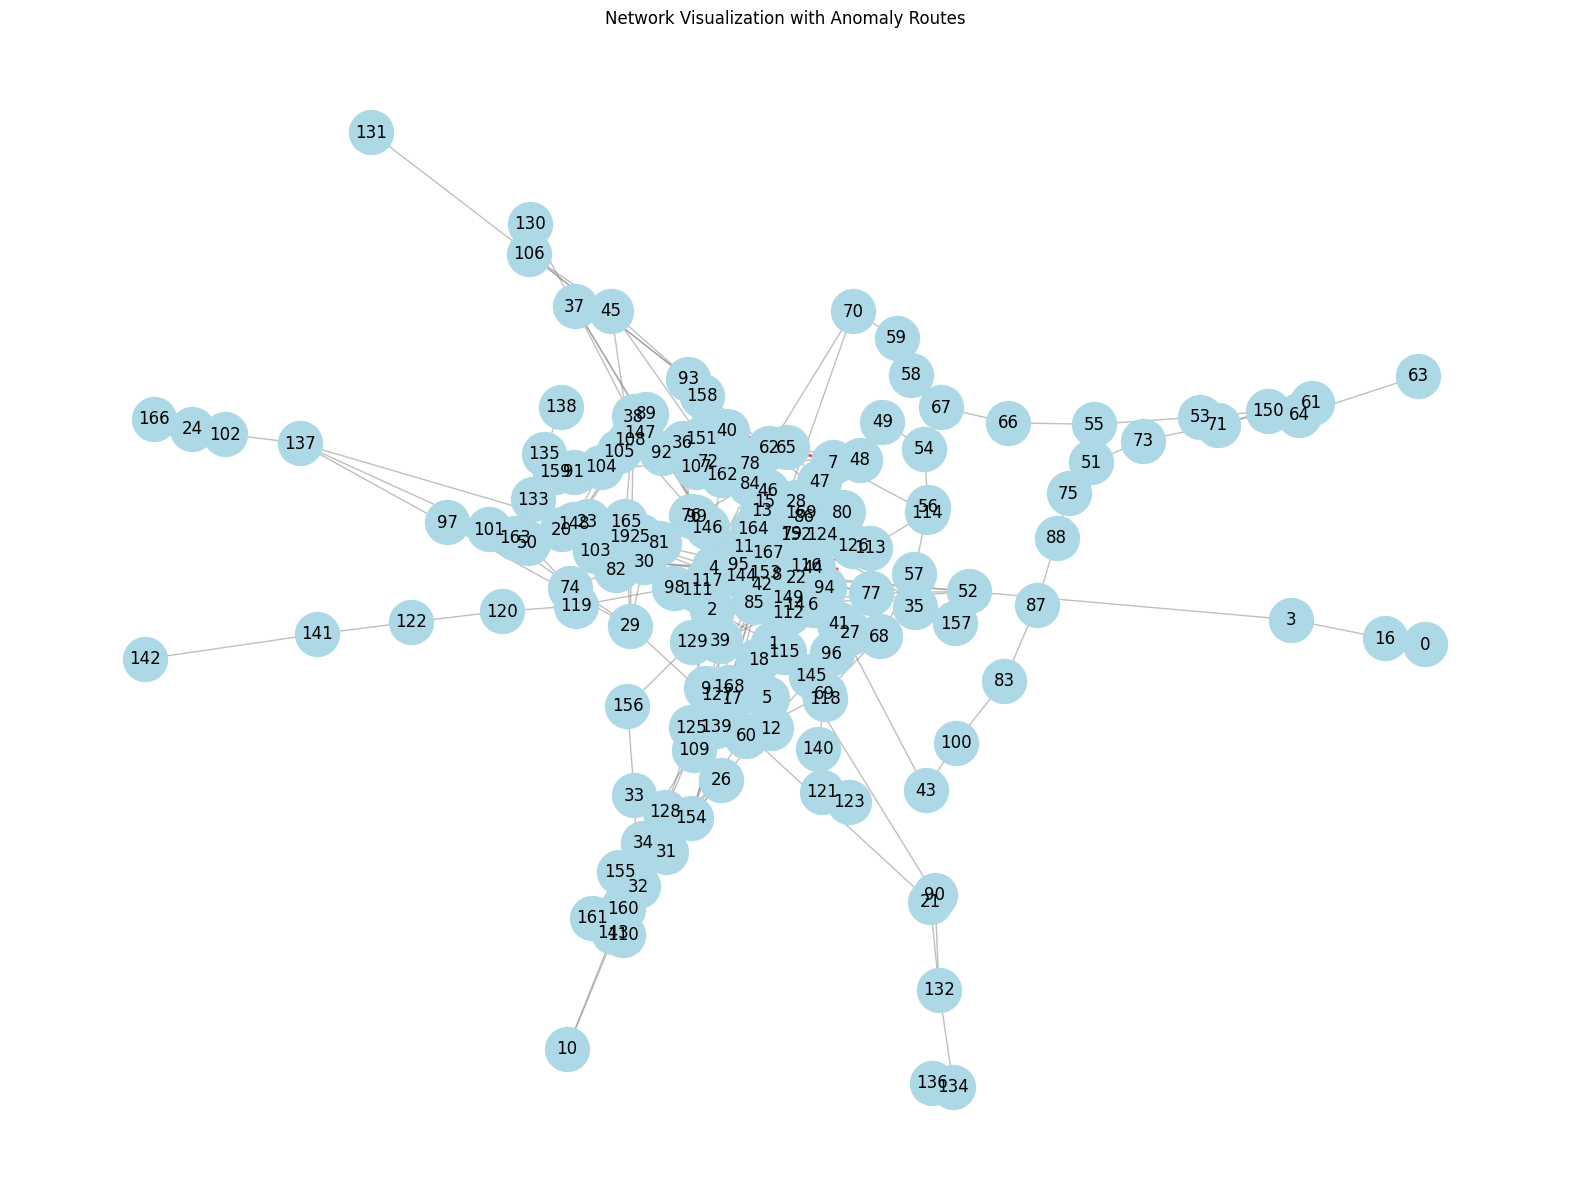

Anomaly Routes:
Route 1: 169 -> 7
Route 2: 18 -> 6
Route 3: 101 -> 19
Route 4: 44 -> 8
Route 5: 41 -> 7
Route 6: 8 -> 117
Route 7: 8 -> 42
Route 8: 8 -> 41
Route 9: 72 -> 162
Route 10: 162 -> 13
Route 11: 124 -> 7
Route 12: 7 -> 40
Route 13: 130 -> 106


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('./PEMS08.csv')

# Step 2: Create a directed graph from the DataFrame
G = nx.from_pandas_edgelist(df, 'from', 'to', ['cost'], create_using=nx.DiGraph)

# Step 3: Analyze the graph for potential anomalies

# 3.2: Identify edges with unusually high costs
edge_costs = nx.get_edge_attributes(G, 'cost')
mean_cost = sum(edge_costs.values()) / len(edge_costs)
high_cost_edges = [(source, target) for (source, target), cost in edge_costs.items() if cost > 1.5 * mean_cost]  # Adjust the threshold as needed
print("High Cost Edges:", high_cost_edges)

# Step 4: Visualize the graph with anomalies marked
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G)  # You can use any layout algorithm here

# Draw edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color='gray')

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

# Highlight high cost edges and label anomaly routes
anomaly_routes = []
for edge in high_cost_edges:
    anomaly_route = nx.shortest_path(G, edge[0], edge[1], weight='cost')
    anomaly_routes.append(anomaly_route)
    nx.draw_networkx_edges(G, pos, edgelist=[(anomaly_route[i], anomaly_route[i+1]) for i in range(len(anomaly_route)-1)], width=2.0, alpha=0.7, edge_color='red')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(anomaly_route[i], anomaly_route[i+1]): f"{edge_costs[(anomaly_route[i], anomaly_route[i+1])]:.1f}" for i in range(len(anomaly_route)-1)}, font_color='red')

plt.title('Network Visualization with Anomaly Routes')
plt.axis('off')
plt.show()

# Print anomaly routes
print("Anomaly Routes:")
for i, route in enumerate(anomaly_routes):
    print(f"Route {i+1}: {' -> '.join(map(str, route))}")


High Cost Edges: [(169, 7), (18, 6), (101, 19), (44, 8), (41, 7), (8, 117), (8, 42), (8, 41), (72, 162), (162, 13), (124, 7), (7, 40), (130, 106)]


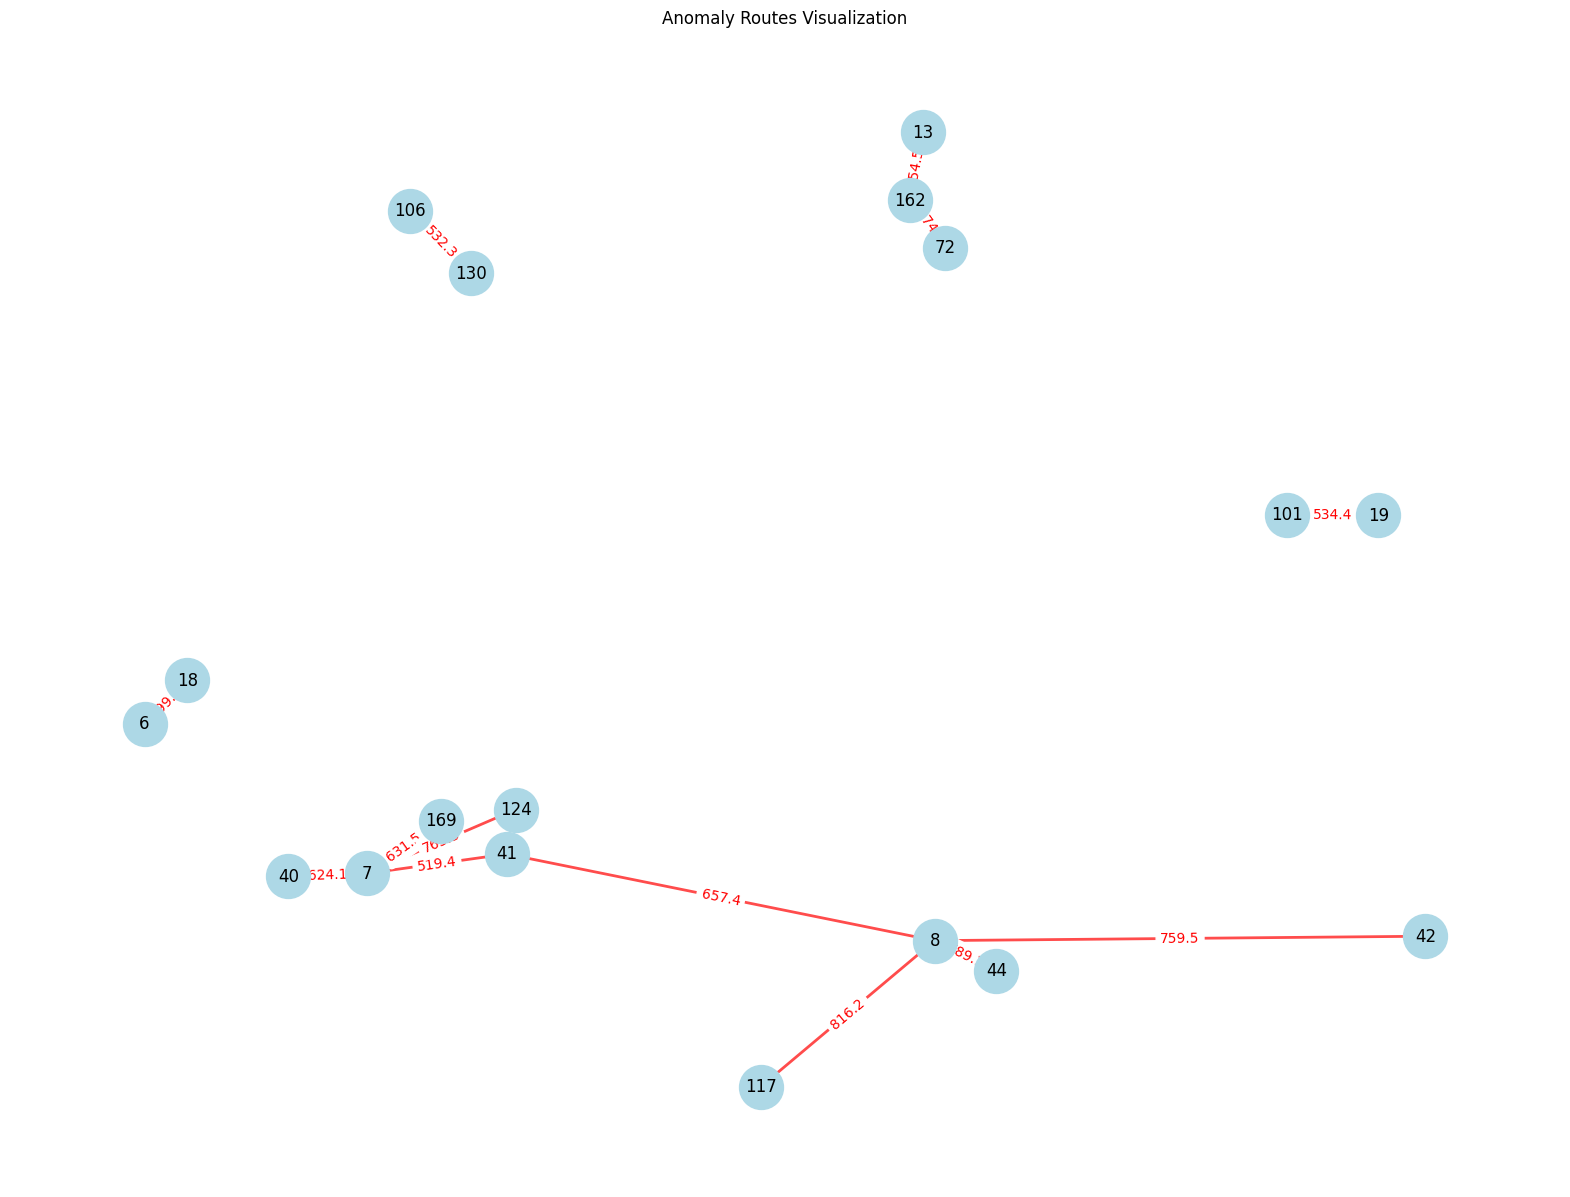

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('PEMS08.csv')

# Step 2: Create a directed graph from the DataFrame
G = nx.from_pandas_edgelist(df, 'from', 'to', ['cost'], create_using=nx.DiGraph)

# Step 3: Analyze the graph for potential anomalies

# 3.2: Identify edges with unusually high costs
edge_costs = nx.get_edge_attributes(G, 'cost')
mean_cost = sum(edge_costs.values()) / len(edge_costs)
high_cost_edges = [(source, target) for (source, target), cost in edge_costs.items() if cost > 1.5 * mean_cost]  # Adjust the threshold as needed
print("High Cost Edges:", high_cost_edges)

# Step 4: Create a new graph containing only the anomaly edges
anomaly_graph = nx.DiGraph(high_cost_edges)

# Step 5: Visualize only the anomaly routes
plt.figure(figsize=(20, 15))

# Generate positions only for nodes in the anomaly_graph
pos = nx.spring_layout(anomaly_graph)

# Draw edges
nx.draw_networkx_edges(anomaly_graph, pos, width=2.0, alpha=0.7, edge_color='red')

# Draw nodes
nx.draw_networkx_nodes(anomaly_graph, pos, node_size=1000, node_color='lightblue')

# Draw labels
nx.draw_networkx_labels(anomaly_graph, pos, font_size=12, font_color='black')

# Add edge labels (only for edges in the anomaly_graph)
edge_labels = {edge: edge_costs[edge] for edge in high_cost_edges}
nx.draw_networkx_edge_labels(anomaly_graph, pos, edge_labels=edge_labels, font_color='red')

plt.title('Anomaly Routes Visualization')
plt.axis('off')
plt.show()
